In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats

# 데이터 불러오기

In [5]:
return_df = pd.read_excel('C:/Users/caban/Desktop/career/finance/FinLab/kospi_portfolio/kospi_df_1.xlsx', sheet_name=0, header=0)

In [6]:
return_df.head()

,날짜,kospi 수익률,kospi 시가총액
0,2017-10-02,0.9,100
1,2017-10-03,0.9,100
2,2017-10-04,0.9,100
3,2017-10-05,0.9,100
4,2017-10-06,0.9,100


In [7]:
return_df.rename(columns = {'날짜' : 'date', 'kospi 수익률' : 'kospi_return'}, inplace=True)

In [8]:
return_df.drop('kospi 시가총액', axis=1, inplace=True)

In [9]:
return_df.head()

,date,kospi_return
0,2017-10-02,0.9
1,2017-10-03,0.9
2,2017-10-04,0.9
3,2017-10-05,0.9
4,2017-10-06,0.9


In [10]:
return_kospi_df = return_df
del return_df

In [12]:
return_individual_df = pd.read_excel('C:/Users/caban/Desktop/career/finance/FinLab/kospi_portfolio/kospi_df_1.xlsx', sheet_name=1)

In [13]:
return_individual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Columns: 885 entries, date to 엘브이엠씨홀딩스
dtypes: datetime64[ns](1), float64(884)
memory usage: 2.4 MB


In [14]:
return_individual_df.fillna(0, inplace=True)

In [15]:
sichong_individual_df = pd.read_excel('C:/Users/caban/Desktop/career/finance/FinLab/kospi_portfolio/kospi_df_1.xlsx', sheet_name=2)

In [16]:
sichong_individual_df.set_index('date', inplace=True)

In [17]:
return_kospi_df.set_index('date', inplace=True)

In [18]:
return_individual_df.set_index('date', inplace=True)

In [19]:
sichong_individual_df.fillna(0, inplace=True)

# 합산 시가총액 시리즈 만들기

In [20]:
sichong_total_series = sichong_individual_df.apply((lambda x: sum(x)), axis=1)

In [21]:
sichong_total_series.tail()

date
2018-09-24    1.560659e+09
2018-09-25    1.560659e+09
2018-09-26    1.560659e+09
2018-09-27    1.571317e+09
2018-09-28    1.562833e+09
dtype: float64

In [22]:
len(sichong_total_series)

362

In [23]:
len(sichong_individual_df.columns)

884

In [24]:
len(sichong_individual_df)

362

# 가중계수 구하는 함수

In [25]:
def calculate_weight(col_name):
    weight_list = []
    for i in range(0, len(sichong_total_series)):
        weight_list.append(sichong_individual_df[col_name][i] / sichong_total_series[i])
    weight_df = pd.DataFrame(data=weight_list, columns=[col_name])
    
    return weight_df

In [26]:
weight_df = calculate_weight('동화약품')

In [27]:
weight_df.rename(columns={'동화약품':0}, inplace=True)

In [28]:
for col in sichong_individual_df.columns:
    weight_df_1 = calculate_weight(col)
    weight_df = pd.concat([weight_df, weight_df_1], axis=1)

In [29]:
weight_df.drop(0, axis=1, inplace=True)

In [30]:
weight_df.head()

,동화약품,우리은행,KR모터스,경방,메리츠화재,삼양홀딩스,삼양홀딩스우,하이트진로,하이트진로2우B,유한양행,...,롯데정보통신,하나제약,HDC현대산업개발,효성화학,효성티앤씨,효성중공업,효성첨단소재,한일시멘트,세아제강,엘브이엠씨홀딩스
0,0.000152,0.007682,0.000062,0.000246,0.001732,0.000483,0.000011,0.001174,0.000014,0.001534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000153
1,0.000152,0.007682,0.000062,0.000246,0.001732,0.000483,0.000011,0.001174,0.000014,0.001534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000153
2,0.000152,0.007682,0.000062,0.000246,0.001732,0.000483,0.000011,0.001174,0.000014,0.001534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000153
3,0.000152,0.007682,0.000062,0.000246,0.001732,0.000483,0.000011,0.001174,0.000014,0.001534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000153
4,0.000152,0.007682,0.000062,0.000246,0.001732,0.000483,0.000011,0.001174,0.000014,0.001534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000153


In [31]:
return_individual_df.head()

,동화약품,우리은행,KR모터스,경방,메리츠화재,삼양홀딩스,삼양홀딩스우,하이트진로,하이트진로2우B,유한양행,...,롯데정보통신,하나제약,HDC현대산업개발,효성화학,효성티앤씨,효성중공업,효성첨단소재,한일시멘트,세아제강,엘브이엠씨홀딩스
date,,,,,,,,,,,,,,,,,,,,,
2017-10-02,0.12,0.85,1.97,-1.05,2.28,0.11,-0.18,0.77,1.32,1.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-10-03,0.12,0.85,1.97,-1.05,2.28,0.11,-0.18,0.77,1.32,1.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-10-04,0.12,0.85,1.97,-1.05,2.28,0.11,-0.18,0.77,1.32,1.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-10-05,0.12,0.85,1.97,-1.05,2.28,0.11,-0.18,0.77,1.32,1.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-10-06,0.12,0.85,1.97,-1.05,2.28,0.11,-0.18,0.77,1.32,1.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# r_p(코스피 수익률) = sigma(w_i * r_i) 계산하는 함수

In [32]:
def calculate_fake_kospi():
    result = []
    for i in range(0, len(weight_df)):
        fake_kospi_list = []
        for col in weight_df.columns:
            fake_kospi_list.append(weight_df[col][i] * return_individual_df[col][i])
        result.append(sum(fake_kospi_list))
    result = pd.Series(result)
    
    return result

In [33]:
fake_kospi_df = calculate_fake_kospi()

In [34]:
fake_kospi_df = pd.DataFrame(data=fake_kospi_df, columns=['fake_kospi'])

In [35]:
fake_kospi_df = fake_kospi_df.apply(lambda x: round(x,2))

In [36]:
fake_kospi_df.head()

,fake_kospi
0,0.88
1,0.88
2,0.88
3,0.88
4,0.88


In [37]:
return_kospi_df.head()

,kospi_return
date,
2017-10-02,0.9
2017-10-03,0.9
2017-10-04,0.9
2017-10-05,0.9
2017-10-06,0.9


# 코스피수익률 표본분포와 가중평균 코스피수익률 표본분포 비교
### 육안상으로도 유사하지만, 통계량상으로도 유사하다
### 두 분포 모두 negative skewed 분포이다

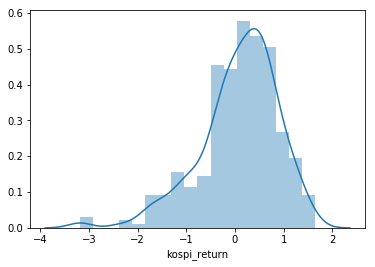

In [38]:
sns.distplot(return_kospi_df['kospi_return'])

In [39]:
scipy.stats.describe(return_kospi_df['kospi_return'])

DescribeResult(nobs=362, minmax=(-3.18, 1.64), mean=0.08339779005524862, variance=0.6528008884161554, skewness=-0.9935428123549616, kurtosis=1.6366812933843198)

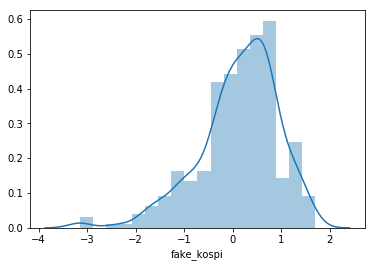

In [40]:
sns.distplot(fake_kospi_df['fake_kospi'])

In [41]:
scipy.stats.describe((fake_kospi_df['fake_kospi']))

DescribeResult(nobs=362, minmax=(-3.15, 1.7), mean=0.1287292817679558, variance=0.6771751121041919, skewness=-0.9604136028949245, kurtosis=1.5261451303050872)

# Kolmogorov-Smirnov 검증(2개 표본) 
### D-통계량을 이용. 2개 표본의 cdf를 비교. D-통계량 값이 낮을수록 p-값은 커진다
### H_0 : 2개 표본은 서로 같은 분포를 따름 vs H_a : 서로 다른 분포를 따름
### 검증 결과 p-값이 설정하였던 유의수준 0.05 보다 크게 나와 귀무가설을 기각. 2개 표본은 같은 분포를 따른다는 결론

In [111]:
scipy.stats.ks_2samp(fake_kospi_df['fake_kospi'], return_kospi_df['kospi_return'])

Ks_2sampResult(statistic=0.074585635359116, pvalue=0.25631693704763575)

# 2개 표본에 대한 산점도, 피어슨 상관계수, line plot
### 매우 유의한 양의 상관관계를 가지고 있다 -> 거의 같은 분포와 데이터값을 가진다
### line plot을 봐도 거의 완전히 일치한다는 것을 알 수 있다

In [112]:
fake_kospi_df.set_index(return_kospi_df.index, inplace=True)

In [113]:
all_df_1 = fake_kospi_df.join(return_kospi_df)

In [114]:
all_df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-10-02 to 2018-09-28
Freq: D
Data columns (total 2 columns):
fake_kospi      362 non-null float64
kospi_return    362 non-null float64
dtypes: float64(2)
memory usage: 18.5 KB


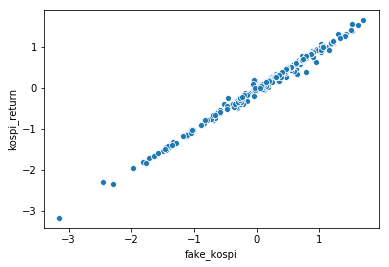

In [115]:
sns.scatterplot(data=all_df_1, x='fake_kospi', y='kospi_return')

In [116]:
scipy.stats.pearsonr(all_df_1['fake_kospi'], all_df_1['kospi_return'])

(0.9967007510800246, 0.0)

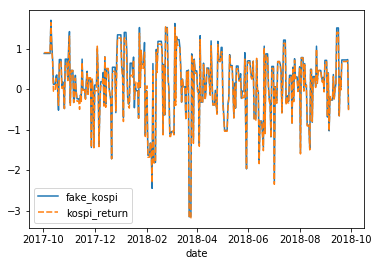

In [121]:
sns.lineplot(data=all_df_1)

# 배당수익률 데이터 불러오기

In [43]:
dividend_df = pd.read_excel('C:/Users/caban/Desktop/career/finance/FinLab/kospi_portfolio/dividend_df_1.xlsx')

In [44]:
dividend_df.head()

,date,동화약품,우리은행,KR모터스,경방,메리츠화재,삼양홀딩스,삼양홀딩스우,하이트진로,하이트진로2우B,...,롯데정보통신,하나제약,HDC현대산업개발,효성화학,효성티앤씨,효성중공업,효성첨단소재,한일시멘트,세아제강,엘브이엠씨홀딩스
0,2017-10-02,1.54,3.17,NaN,1.29,4.85,1.64,NaN,3.32,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-10-03,1.54,3.17,NaN,1.29,4.85,1.64,NaN,3.32,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-10-04,1.54,3.17,NaN,1.29,4.85,1.64,NaN,3.32,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-10-05,1.54,3.17,NaN,1.29,4.85,1.64,NaN,3.32,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-10-06,1.54,3.17,NaN,1.29,4.85,1.64,NaN,3.32,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
dividend_df.set_index('date', inplace=True)

In [46]:
dividend_df.tail()

,동화약품,우리은행,KR모터스,경방,메리츠화재,삼양홀딩스,삼양홀딩스우,하이트진로,하이트진로2우B,유한양행,...,롯데정보통신,하나제약,HDC현대산업개발,효성화학,효성티앤씨,효성중공업,효성첨단소재,한일시멘트,세아제강,엘브이엠씨홀딩스
date,,,,,,,,,,,,,,,,,,,,,
2018-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# null값이 굉장히 많다.

In [47]:
dividend_df.isnull().sum()

동화약품          271
우리은행          271
KR모터스         362
경방            271
메리츠화재         271
삼양홀딩스         271
삼양홀딩스우        362
하이트진로         271
하이트진로2우B      362
유한양행          271
유한양행우         362
CJ대한통운        362
하이트진로홀딩스      271
하이트진로홀딩스우     362
두산             90
두산우           362
두산2우B         362
성창기업지주        362
대림산업          271
대림산업우         362
유유제약          271
유유제약1우        362
유유제약2우B       362
일동홀딩스         271
한국타이어월드와이드    271
기아차           271
대유플러스         362
노루홀딩스         271
노루홀딩스우        362
한화손해보험        271
             ... 
일동제약          271
넷마블           271
크라운제과         271
크라운제과우        362
현대중공업지주       362
현대일렉트릭        362
현대건설기계        362
경동도시가스        271
미원에스씨         271
오리온           271
제일약품          271
진에어           271
삼양패키징         362
롯데제과          271
케이씨텍          271
BGF리테일        271
동아타이어         362
쿠쿠홈시스         362
SK케미칼         362
SK케미칼우        362
롯데정보통신        362
하나제약          362
HDC현대산업개발     362
효성화학          362
효성티앤씨     

In [48]:
dividend_df.fillna(0, inplace=True)

In [49]:
dividend_df.isnull().sum()

동화약품          0
우리은행          0
KR모터스         0
경방            0
메리츠화재         0
삼양홀딩스         0
삼양홀딩스우        0
하이트진로         0
하이트진로2우B      0
유한양행          0
유한양행우         0
CJ대한통운        0
하이트진로홀딩스      0
하이트진로홀딩스우     0
두산            0
두산우           0
두산2우B         0
성창기업지주        0
대림산업          0
대림산업우         0
유유제약          0
유유제약1우        0
유유제약2우B       0
일동홀딩스         0
한국타이어월드와이드    0
기아차           0
대유플러스         0
노루홀딩스         0
노루홀딩스우        0
한화손해보험        0
             ..
일동제약          0
넷마블           0
크라운제과         0
크라운제과우        0
현대중공업지주       0
현대일렉트릭        0
현대건설기계        0
경동도시가스        0
미원에스씨         0
오리온           0
제일약품          0
진에어           0
삼양패키징         0
롯데제과          0
케이씨텍          0
BGF리테일        0
동아타이어         0
쿠쿠홈시스         0
SK케미칼         0
SK케미칼우        0
롯데정보통신        0
하나제약          0
HDC현대산업개발     0
효성화학          0
효성티앤씨         0
효성중공업         0
효성첨단소재        0
한일시멘트         0
세아제강          0
엘브이엠씨홀딩스      0
Length: 884, dtype: int6

In [50]:
len(dividend_df.columns) == len(weight_df.columns)

True

# 사전의 산술식 그대로. 개별종목 배당수익률들의 가중평균을 계산해주는 함수

In [51]:
def calculate_fake_dividend():
    result = []
    for i in range(0, len(weight_df)):
        fake_dividend_list = []
        for col in weight_df.columns:
            fake_dividend_list.append(weight_df[col][i] * dividend_df[col][i])
        result.append(sum(fake_dividend_list))
    result = pd.Series(result)
    
    return result

In [52]:
fake_dividend_df = pd.DataFrame(data=calculate_fake_dividend(), columns=['fake_dividend'])

In [53]:
fake_dividend_df = fake_dividend_df.apply(lambda x: round(x, 2))

In [54]:
fake_dividend_df.head()

,fake_dividend
0,1.38
1,1.38
2,1.38
3,1.38
4,1.38


# 배당이 특정 시점에만 극단적으로 몰려있는 것을 알 수 있다.

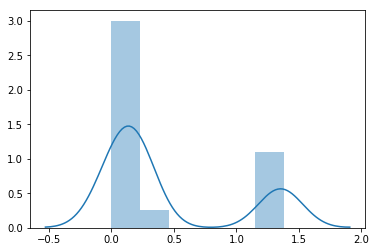

In [55]:
sns.distplot(fake_dividend_df)

In [56]:
len(fake_kospi_df) == len(fake_dividend_df)

True

In [57]:
type(fake_kospi_df['fake_kospi'][0]) == type(fake_dividend_df['fake_dividend'][0])

True

# (배당수익률 + 수익률) 합산 수익률을 계산

In [58]:
total_list = []
for i in range(0, len(fake_dividend_df)):
    total_list.append(fake_kospi_df['fake_kospi'][i] + fake_dividend_df['fake_dividend'][i])

In [59]:
total_list[0:5]

[2.26, 2.26, 2.26, 2.26, 2.26]

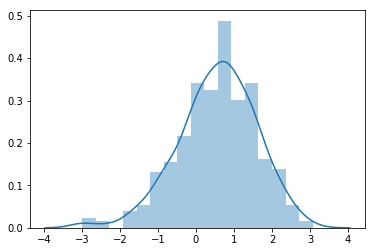

In [60]:
sns.distplot(total_list)

# Shapiro-Wilk 검증
### H_0 : 해당분포가 정규성이 있다. vs H_a : 해당분포가 정규성이 없다.
### 이 경우 통계량 값이 0.985, p-값이 설정하였던 유의수준 0.05보다 작게나와 귀무가설을 기각. 해당분포는 정규성이 없다는 결론

In [62]:
scipy.stats.shapiro(total_list)

(0.985281765460968, 0.0009595088195055723)

In [63]:
fake_total_df = pd.DataFrame(data=total_list, columns=['fake_total'])

In [64]:
fake_total_df.head(3)

,fake_total
0,2.26
1,2.26
2,2.26


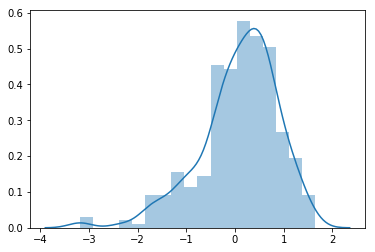

In [65]:
sns.distplot(return_kospi_df)

# Kolmogorov-Smirnov 검증(2개 표본)
### p-값이 매우 낮으므로 유의하다고 판단하여 귀무가설을 기각. 즉 서로 다른 분포를 따른다

In [67]:
scipy.stats.ks_2samp(return_kospi_df['kospi_return'], fake_total_df['fake_total'])

Ks_2sampResult(statistic=0.3121546961325966, pvalue=4.882740843499405e-16)

In [97]:
date_index = return_kospi_df.index

In [100]:
fake_total_df.set_index(date_index, inplace=True)

In [101]:
all_df = return_kospi_df.join(fake_total_df)

In [102]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-10-02 to 2018-09-28
Data columns (total 2 columns):
kospi_return    362 non-null float64
fake_total      362 non-null float64
dtypes: float64(2)
memory usage: 8.5 KB


# 두 표본에 대한 산점도, 피어슨 상관계수, line plot
### 상관계수 값 = 0.847, 매우 유의함
### 2017년 10~12월에만 배당수익률의 영향을 받아서 그래프의 차이를 보임

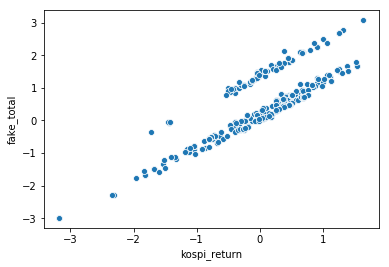

In [105]:
sns.scatterplot(data=all_df, x='kospi_return', y='fake_total')

In [106]:
scipy.stats.pearsonr(all_df['kospi_return'], all_df['fake_total'])

(0.8469531369406714, 8.425814681538911e-101)

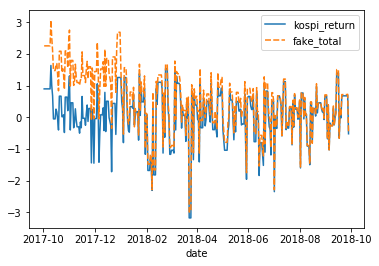

In [119]:
sns.lineplot(data=all_df)